In [1]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data_with_sent
from utils import comp_metrics
import numpy as np

In [2]:
version = 'v4'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [3]:
# Daten laden
td, vd = load_data_with_sent(data_path, window_size=30)

In [4]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

Predicting AAPL...
Metrics for AAPL
Mean Absolute Error (MAE): 1.4397127628326416
Mean Squared Error (MSE): 3.7606563568115234
Accuracy: 98.59%


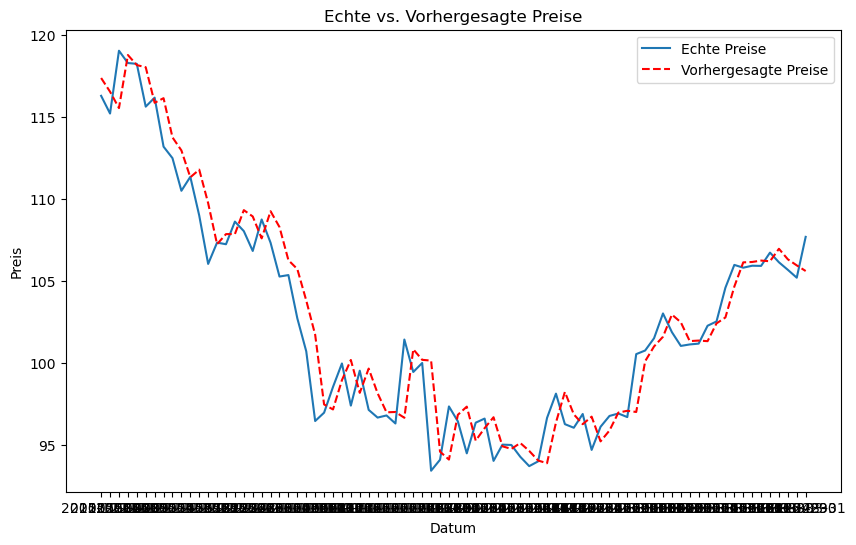

Predicting AMZN...
Metrics for AMZN
Mean Absolute Error (MAE): 11.316061019897461
Mean Squared Error (MSE): 243.35537719726562
Accuracy: 98.09%


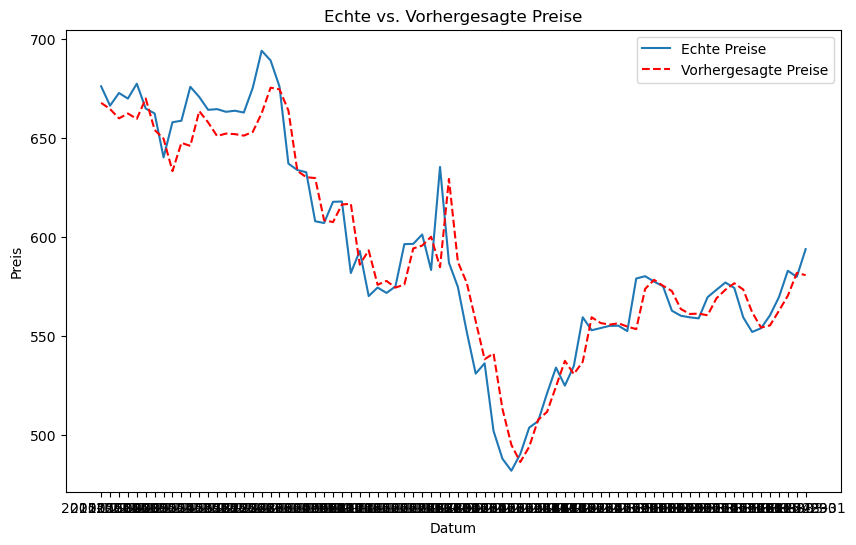

Predicting CSCO...
Metrics for CSCO
Mean Absolute Error (MAE): 0.3578575849533081
Mean Squared Error (MSE): 0.22652213275432587
Accuracy: 98.59%


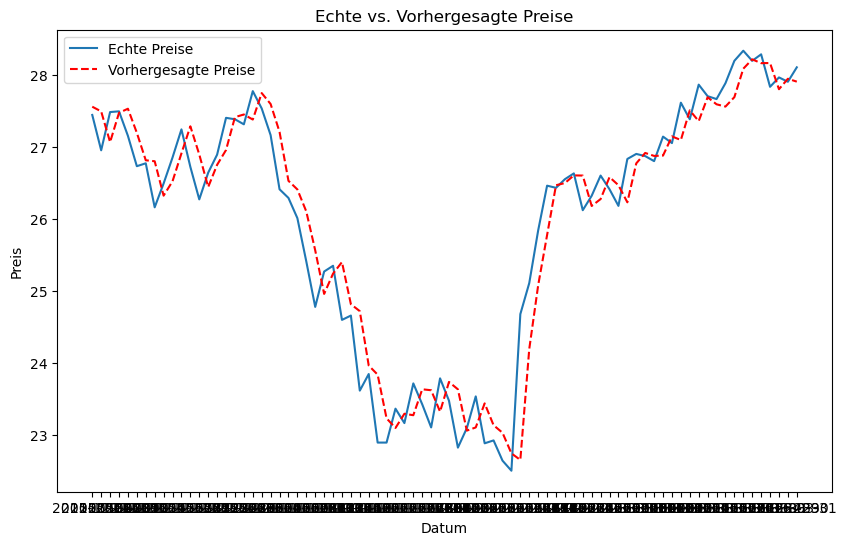

Predicting FB...
Metrics for FB
Mean Absolute Error (MAE): 1.8074228763580322
Mean Squared Error (MSE): 6.763524532318115
Accuracy: 98.29%


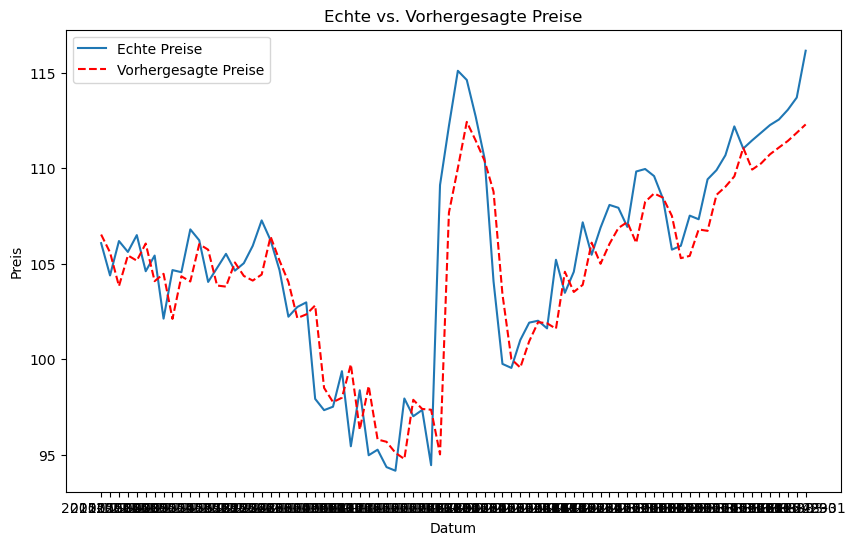

Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 8.816183090209961
Mean Squared Error (MSE): 129.61593627929688
Accuracy: 98.79%


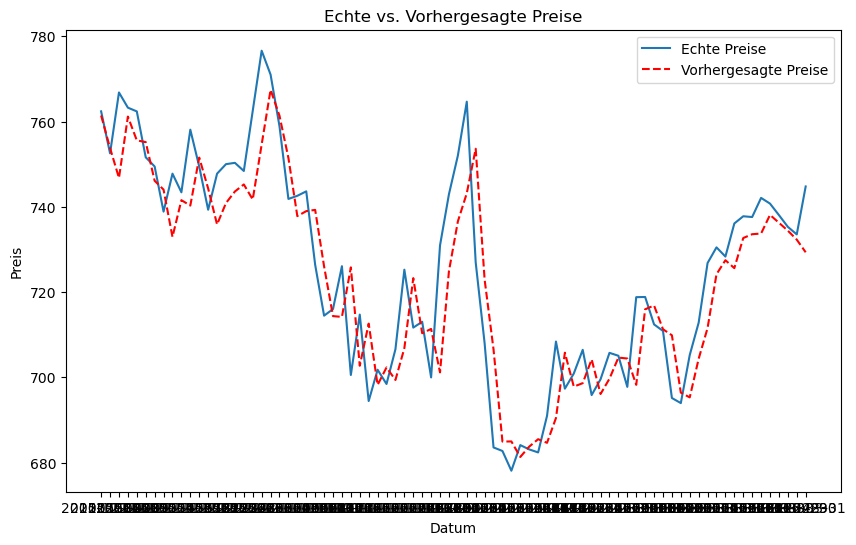

Predicting INTC...
Metrics for INTC
Mean Absolute Error (MAE): 0.4247465133666992
Mean Squared Error (MSE): 0.35236260294914246
Accuracy: 98.65%


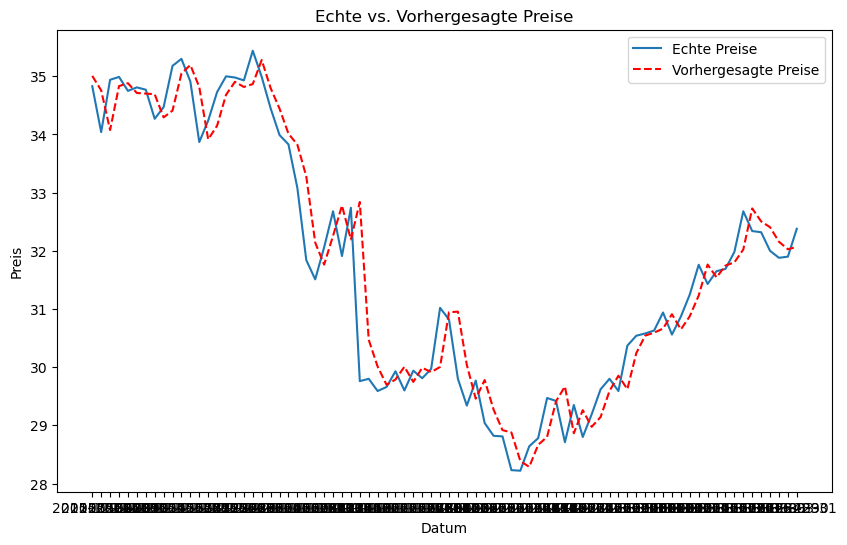

Predicting KO...
Metrics for KO
Mean Absolute Error (MAE): 0.3161107897758484
Mean Squared Error (MSE): 0.1663518249988556
Accuracy: 99.27%


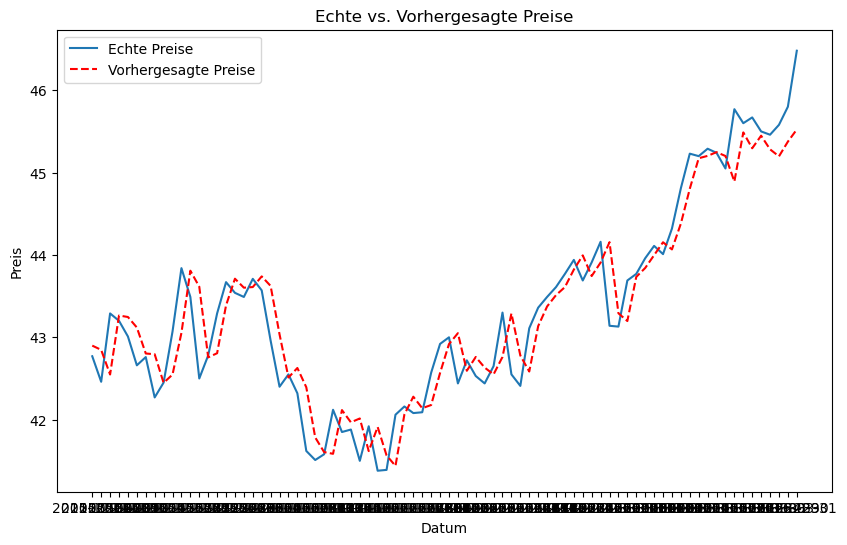

Predicting MA...
Metrics for MA
Mean Absolute Error (MAE): 1.2239524126052856
Mean Squared Error (MSE): 2.5883584022521973
Accuracy: 98.64%


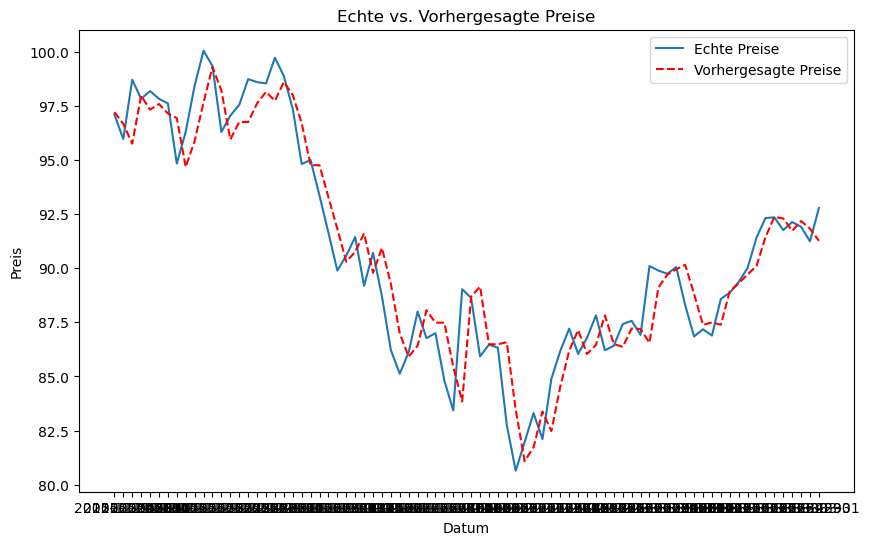

Predicting MSFT...
Metrics for MSFT
Mean Absolute Error (MAE): 0.7439751029014587
Mean Squared Error (MSE): 0.8574355244636536
Accuracy: 98.60%


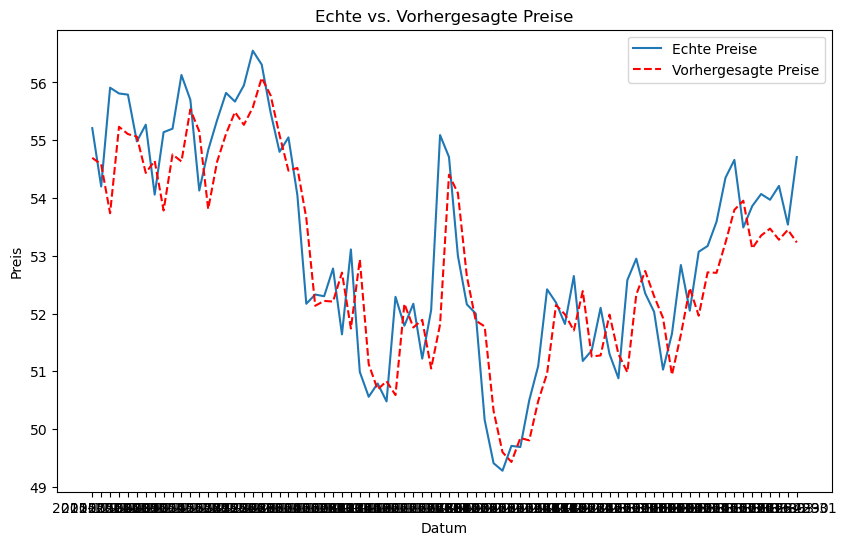

Predicting ORCL...
Metrics for ORCL
Mean Absolute Error (MAE): 0.4556707739830017
Mean Squared Error (MSE): 0.3481140732765198
Accuracy: 98.77%


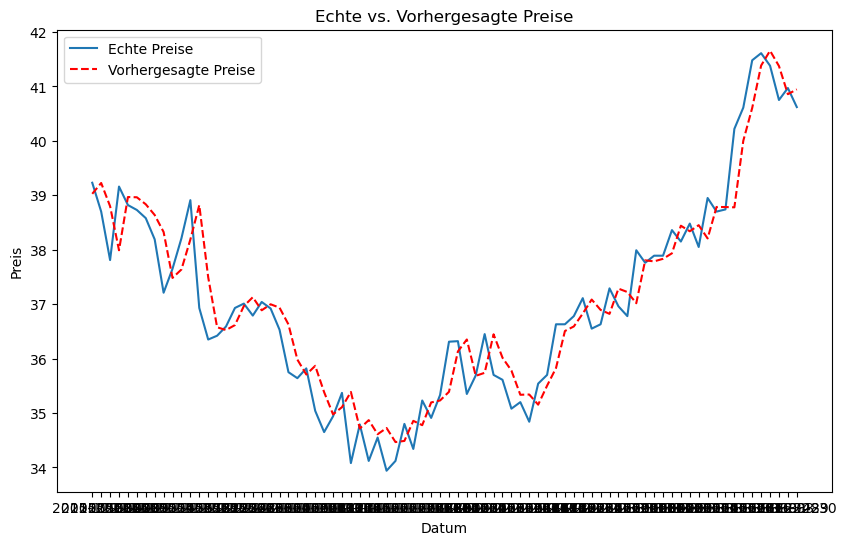

In [5]:
for i in range(len(vd)):
    stock_vd = vd[i]
    scaler = stock_vd['scaler']
    stock_name = stock_vd['stock']
    df = stock_vd['df']
    
    X = []
    y = []
    for i in range(len(stock_vd['val_data'])):
        data = stock_vd['val_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    X_nums = X[:,:, :1]
    X_sent = X[:,:, 1:]
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict([X_nums, X_sent])
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)